## Find distinguishing properties of modalities

In [1]:
%load_ext autoreload
%autoreload 2

import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline



import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:55: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2015-12-28 15:48:21	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2015-12-28 15:48:21	Parsing datapackage to create a Study object
2015-12-28 15:49:06	Initializing Study
2015-12-28 15:49:06	Initializing Predictor configuration manager for Study
2015-12-28 15:49:06	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-12-28 15:49:06	Added ExtraTreesClassifier to default predictors
2015-12-28 15:49:06	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-12-28 15:49:06	Added ExtraTreesRegressor to default predictors
2015-12-28 15:49:06	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-12-28 15:49:06	Added GradientBoostingClassifier to default predictors
2015-12-28 15:49:06	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [2]:
study.supplemental.modalities_tidy.head()

,phenotype,event_name,modality
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,~1
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,~1
2,MN,exon:chr10:103348089-103348157:+@exon:chr10:10...,~1
3,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal
4,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal


In [3]:
study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality  
MN         bimodal        390
           multimodal       1
           ~0             566
           ~1            1639
NPC        bimodal        799
           multimodal       2
           ~0            1092
           ~1            3047
iPSC       bimodal       1383
           middle           1
           multimodal      33
           ~0            1605
           ~1            4611
dtype: int64

In [4]:
splicing_singles_no_outliers = study.splicing.singles.ix[not_outliers]


In [5]:
splicing_feature_data = pd.read_csv('{}/singlecell_pnm_figure4_voyages/splicing_feature.csv.gz'.format(flotilla_dir), 
                                          index_col=0, compression='gzip')
print splicing_feature_data.shape
splicing_feature_data.head()

(33693, 103)


/home/obotvinnik/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (11,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,exon3_length,...,isoform1_pfam_go_id,isoform1_pfam_go_name,isoform1_pfam_name,isoform2_pfam_accession,isoform2_pfam_go_id,isoform2_pfam_go_name,isoform2_pfam_name,isoform_domain_effects,custom_1,custom_2
event_id,,,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100189330-100189399:-,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No annotated reading frame --> Protein +/- domain,False,False
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,only one,NaN,only one,ENSG00000107521,exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,only one,NaN,only one,ENSG00000120053,exon:chr10:101165513-101165617:-,105,exon:chr10:101163481-101163631:-,151,exon:chr10:101163226-101163391:-,166,...,NaN,NaN,NaN,PF00155.16[1],"GO:0030170[1],GO:0009058[1]","(pyridoxal phosphate binding)[1],(biosynthetic...",Aminotran_1_2[1],No annotated reading frame --> Protein +/- domain,True,True
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+,only one,NaN,only one,ENSG00000198018,exon:chr10:101419263-101419345:+,83,exon:chr10:101419619-101419721:+,103,exon:chr10:101421203-101421385:+,183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True


In [6]:
join_cols = splicing_feature_data.columns.difference(study.splicing.feature_data.columns)
study.splicing.feature_data = study.splicing.feature_data.join(splicing_feature_data[join_cols])

In [7]:
join_cols = study.expression.feature_data.columns.difference(splicing_feature_data.columns)

study.splicing.feature_data = splicing_feature_data.join(study.expression.feature_data[join_cols], on='one_ensembl_id')
study.splicing.feature_data.head()

,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,exon3_length,...,isoform1_pfam_go_id,isoform1_pfam_go_name,isoform1_pfam_name,isoform2_pfam_accession,isoform2_pfam_go_id,isoform2_pfam_go_name,isoform2_pfam_name,isoform_domain_effects,custom_1,custom_2
event_id,,,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100189330-100189399:-,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No annotated reading frame --> Protein +/- domain,False,False
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,only one,NaN,only one,ENSG00000107521,exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,only one,NaN,only one,ENSG00000120053,exon:chr10:101165513-101165617:-,105,exon:chr10:101163481-101163631:-,151,exon:chr10:101163226-101163391:-,166,...,NaN,NaN,NaN,PF00155.16[1],"GO:0030170[1],GO:0009058[1]","(pyridoxal phosphate binding)[1],(biosynthetic...",Aminotran_1_2[1],No annotated reading frame --> Protein +/- domain,True,True
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+,only one,NaN,only one,ENSG00000198018,exon:chr10:101419263-101419345:+,83,exon:chr10:101419619-101419721:+,103,exon:chr10:101421203-101421385:+,183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True


In [8]:
study.save('singlecell_pnm_figure3_modalities_bayesian_features')

Wrote datapackage to /home/obotvinnik/flotilla_projects/singlecell_pnm_figure3_modalities_bayesian_features/datapackage.json


## Global features of modalities

### Random examples of modalities

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/random_estimated_modalities': File exists


/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


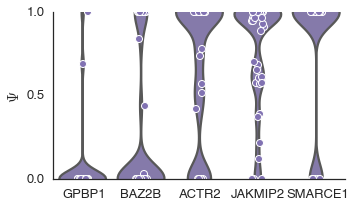

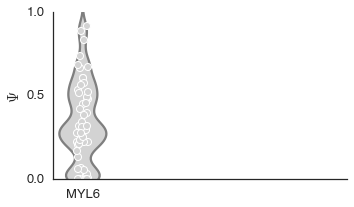

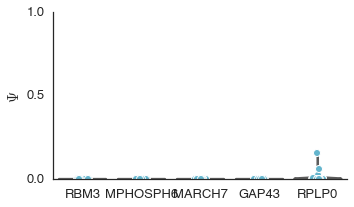

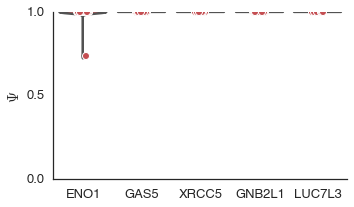

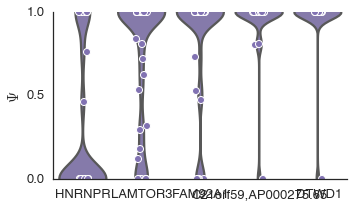

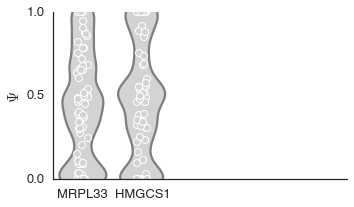

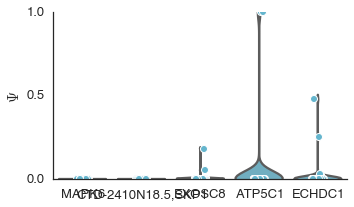

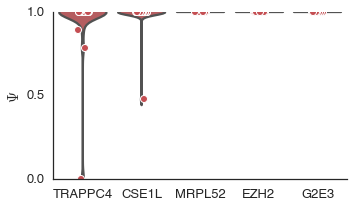

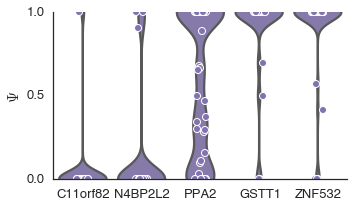

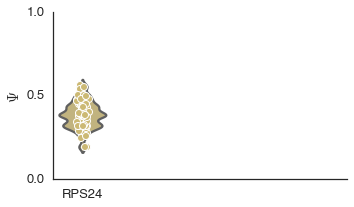

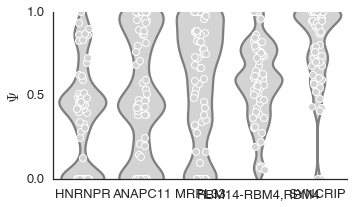

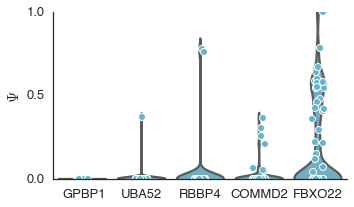

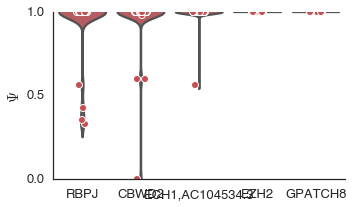

In [ ]:
random_examples_folder = '{}/random_estimated_modalities'.format(folder)
! mkdir $random_examples_folder


from modish import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE


psi_grouped = splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype)

n_violins = 5
width = n_violins * 1
height = 3

for (phenotype, modality), df in study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']):
    try:
        random_events = np.random.choice(df.event_name, size=n_violins, replace=False)
    except ValueError:
        random_events = df.event_name

#     print phenotype, modality
    psi_subset = splicing_singles_no_outliers.ix[psi_grouped.groups[phenotype], random_events]
    fig, ax = plt.subplots(figsize=(width, height))
    
    ordering_scores = psi_subset.apply(flotilla.compute.splicing.switchy_score, axis=0)
    ordering_scores.sort()
    
    psi_tidy = psi_subset.unstack().reset_index().dropna()
    psi_tidy = psi_tidy.rename(columns={'level_0': 'event_name', 0: '$\Psi$', 'level_1': 'sample_id'})

    
    color = MODALITY_TO_COLOR[modality]
    sns.violinplot(x='event_name', y='$\Psi$', data=psi_tidy, ax=ax, bw=0.2, scale='width', color=color, inner=None,
                   order=ordering_scores.index)
    sns.stripplot(x='event_name', y='$\Psi$', data=psi_tidy, ax=ax, jitter=True, color=color,
                  order=ordering_scores.index)
    if modality == 'middle':
        for x in ax.get_xticklabels():
            x = x.get_text()
    xticklabels = study.splicing.feature_data.loc[random_events, 'gene_name']
    ax.set(xticklabels=xticklabels, yticks=[0, 0.5, 1], ylim=(0, 1), xlabel='', xlim=(-0.5, n_violins-0.5))
    sns.despine()
    fig.tight_layout()
    fig.savefig('{}/estimated_modalities_violins_{}_{}.pdf'.format(random_examples_folder, modality, phenotype))

### Clustering of modalities

In [ ]:
modality_clustering_folder = '{}/modality_clustering'.format(folder)
! mkdir $modality_clustering_folder

featurewises = True, False

for (phenotype, modality), df in study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']):
    print phenotype, modality, df.shape
    if df.shape[0] < 5:
        continue
    for featurewise in featurewises:
        g = study.plot_correlations(data_type='splicing', sample_subset=phenotype, feature_subset=df.event_name,
                                   featurewise=featurewise, metric='cityblock')
        suffix = '_featurewise' if featurewise else ''
        g.savefig('{}/{}_{}{}.pdf'.format(modality_clustering_folder, phenotype, modality, suffix))

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/modality_clustering': File exists



### Overlap of modalities

In [ ]:
import matplotlib_venn

for modality, df in study.supplemental.modalities_tidy.groupby('modality'):
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    grouped = df.groupby('phenotype')
    events = [set(grouped.get_group(p).event_name) if p in grouped.groups else set([]) for p in study.phenotype_order]
    labels = study.phenotype_order
    colors = [study.phenotype_to_color[x] for x in labels]
    matplotlib_venn.venn3(events, set_labels=labels, set_colors=colors, ax=ax)
    ax.set_title(modality)
    fig.savefig('{}/modalities_venn_{}.pdf'.format(folder, modality))

## Features of modalities

### Gene features

In [ ]:
splicing_feature_data = pd.read_csv(
    '/projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/splicing_feature.csv.gz', index_col=0, compression='gzip')
study.splicing.feature_data = splicing_feature_data
study.splicing.feature_data.head()

### Modality expression

In [ ]:
study.splicing.feature_expression_id_col = 'ensembl_id'

In [ ]:
splicing_tidy = study.tidy_splicing_with_expression.copy()
print splicing_tidy.shape
splicing_tidy.head()

In [ ]:
singles_not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
splicing_tidy_singles = splicing_tidy.ix[splicing_tidy.sample_id.isin(singles_not_outliers)]
print splicing_tidy_singles.shape
splicing_tidy_singles.head()

In [ ]:
splicing_tidy_singles = splicing_tidy_singles.join(study.sample_id_to_phenotype, on='sample_id')
splicing_tidy_singles.head()

In [ ]:
modalities_expression = study.supplemental.modalities_tidy.merge(
    splicing_tidy_singles, left_on=['event_name', 'phenotype'], right_on=['event_name', 'phenotype'])
print modalities_expression.shape
modalities_expression.head()


In [ ]:
modalities_expression = modalities_expression.join(modalities_expression.groupby(['event_name', 'sample_id']).expression.sum(),
                           on=['event_name', 'sample_id'], rsuffix='_summed', lsuffix='_original')

In [ ]:
modalities_expression['$\log_2(TPM+1)$'] = np.log2(modalities_expression.expression_summed+1)
modalities_expression.head()

In [ ]:
from modish import MODALITY_ORDER, MODALITY_PALETTE

In [ ]:

g = sns.factorplot(y='$\log_2(TPM+1)$', x='phenotype', hue='modality', data=modalities_expression, 
               kind='violin', aspect=2, cut=True, 
                   hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE)
g.set(ylim=(0, 15))
g.savefig('{}/modalities_expression.pdf'.format(folder))

In [ ]:
col = '$\log_2(TPM+1)$'
g = sns.FacetGrid(modalities_expression,  col='phenotype', hue='modality', size=3,
                   col_order=study.phenotype_order, 
                  hue_order=MODALITY_ORDER,
                  palette=MODALITY_PALETTE, 
                  legend_out=True)
g.map(flotilla.visualize.generic.cdfplot, col, log=False, alpha=0.75, linewidth=3)
g.add_legend();
g.set(ylim=(0, 1), xlim=(0, 15))
for ax in g.axes.flat:
    ax.locator_params('x', nbins=4)
    if ax.is_first_col():
        ax.locator_params('y', nbins=4)
        ax.set_ylabel('Cummulative Distribution')
g.savefig('{}/modalities_expression_cdf.pdf'.format(folder))

### Splicing features

In [ ]:
sorted(study.splicing.feature_data.columns)

In [ ]:
modalities_annotated = study.supplemental.modalities_tidy.join(study.splicing.feature_data, on='event_name')
modalities_annotated.head()

### 5' and 3' splice site motifs

In [ ]:
modalities_annotated.exon2_splice_site_3p_seq


In [ ]:
folder

In [ ]:
from Bio.Alphabet import generic_rna

In [ ]:
generic_rna.letters = 'ACGU'

In [ ]:
generic_rna.letters

In [ ]:
from Bio import motifs

splice_site_motifs_figures = '{}/splice_site_motifs'.format(folder)
!mkdir $splice_site_motifs_figures

cols = 'exon2_splice_site_3p_seq', 'exon2_splice_site_5p_seq'

for (phenotype, modality), df in modalities_annotated.groupby(['phenotype', 'modality']):
    for col in cols:
        instances = df[col]
#         instances = instances.str.replace('T', 'U')
        splice_site_motifs = motifs.create(instances,)
        filename = '{}/{}_{}_{}.pdf'.format(splice_site_motifs_figures, col, phenotype, modality)
        splice_site_motifs.weblogo(filename, format='PDF', color_scheme='color_classic')

In [ ]:
splice_site_motifs = motifs.create(df.exon2_splice_site_3p_seq)

In [ ]:
splice_site_motifs.weblogo()

#### Boolean features - Hypergeometric test

In [ ]:
events = study.supplemental.modalities_tidy.groupby('phenotype').apply(lambda x: x.event_name.unique())
n_events = events.apply(len)

events_in_modality = study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).apply(
    lambda x: x.event_name.unique())
n_events_in_modality = events_in_modality.apply(len)

In [ ]:
from scipy.stats import hypergeom

boolean_cols = ['ribosomal', 'ribosomal_subunit', 'gerstberger2014_tf',
        'gerstberger2014_rbp', 'gerstberger2014_rbp_target_mrna',  'gerstberger2014_rbp_target_ncrna',
        'gerstberger2014_rbp_target_ribosome', 'gerstberger2014_rbp_target_trna',
       'cell_cycle', 'cell_surface_markers', 'bioguo_animaltfdb_chromatin_remodeler', 'bioguo_animaltfdb_tf',
       'bioguo_animaltfdb_cofactor', 'exon2_merkin2012_ancient', 'exon2_divisible_by_3']

hue_order = ['~0', 'bimodal', '~1', 'multimodal']
palette = [MODALITY_TO_COLOR[m] for m in hue_order]

ncols = 5
nrows = 1
while nrows * ncols < len(boolean_cols):
    nrows += 1
width = 3.5
height = 2
figsize = ncols * width, nrows * height

heatmap_fig, heatmap_axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
axes_iter = heatmap_axes.flat

for col in boolean_cols:
    g = sns.factorplot(y=col, x='phenotype', hue='modality', data=modalities_annotated, 
                       aspect=1.5, kind='bar', size=2, hue_order=hue_order, 
                       palette=palette,
                      x_order=study.phenotype_order)
    for ax in g.axes.flat:
        ax.locator_params('y', nbins=5)
#     g.fig.tight_layout()
    g.savefig('{}/modalities_features_{}.pdf'.format(folder, col))
    
    p_values = pd.DataFrame(index=hue_order, columns=study.phenotype_order)
    for modality in hue_order:
        for phenotype in study.phenotype_order:
            M = n_events[phenotype]
            N = n_events_in_modality[phenotype, modality]
            n = study.splicing.feature_data.loc[events[phenotype], col].sum()
            x = study.splicing.feature_data.loc[events_in_modality[phenotype, modality], col].sum()

            p_values.loc[modality, phenotype] = hypergeom.sf(x, M, n, N)
    p_values = p_values.astype(float)
    
    heatmap_ax = axes_iter.next()
    plt.sca(heatmap_ax)
    sns.heatmap(-np.log10(p_values), annot=True, mask=p_values > 0.05, 
                cbar_kws=dict(label='$-\log_{10} p$'), ax=heatmap_ax)
    locations, labels = plt.yticks()
    plt.setp(labels, rotation=0)
    heatmap_ax.set(title=col)
heatmap_fig.tight_layout()
heatmap_fig.savefig('{}/modalities_features_boolean_p_values.pdf'.format(folder))

### Numeric features

#### Add gene expression per modality

In [ ]:
study.splicing.feature_expression_id_col = 'ensembl_id'
splicing_tidy = study.tidy_splicing_with_expression.copy()
print splicing_tidy.shape
singles_not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
splicing_tidy_singles = splicing_tidy.ix[splicing_tidy.sample_id.isin(singles_not_outliers)]
print splicing_tidy_singles.shape
splicing_tidy_singles = splicing_tidy_singles.join(study.sample_id_to_phenotype, on='sample_id')


modalities_expression = modalities_annotated.merge(
    splicing_tidy_singles, left_on=['event_name', 'phenotype'], right_on=['event_name', 'phenotype'])
print modalities_expression.shape
modalities_expression = modalities_expression.join(modalities_expression.groupby(['event_name', 'sample_id']).expression.sum(),
                           on=['event_name', 'sample_id'], rsuffix='_summed', lsuffix='_original')

modalities_expression['log2(TPM+1)'] = np.log2(modalities_expression.expression_summed+1)
modalities_expression.head()

mean_expression = modalities_expression.groupby(['event_name', 'sample_id'])['expression_original'].mean()
var_expression = modalities_expression.groupby(['event_name', 'sample_id'])['expression_original'].var()

mean_expression.name = 'expression_mean'
var_expression.name = 'expression_var'



modalities_expression = modalities_expression.join(mean_expression, on=['event_name', 'sample_id'])

modalities_expression = modalities_expression.join(var_expression, on=['event_name', 'sample_id'])
modalities_expression.head()

modalities_expression['expression_var_log2_plus1'] = np.log2(modalities_expression.expression_var+1)
modalities_expression['expression_mean_log2_plus1'] = np.log2(modalities_expression.expression_mean+1)

In [ ]:
modalities_expression_folder = '{}/expression'.format(folder)
! mkdir modalities_expression_folder

fig, axes = plt.subplots(figsize=(16, 12), nrows=3)

cols = 'expression_var_log2_plus1', 'expression_mean_log2_plus1'

for col in cols:
    for ax, (phenotype, phenotype_df) in zip(axes, modalities_expression.groupby('phenotype')):
        rank_col = col + '_rank'
        phenotype = phenotype_df.dropna(subset=[col])
        phenotype_df[rank_col] = phenotype_df[col].rank()
        for modality, modality_df in phenotype_df.groupby('modality'):
            x = modality_df[rank_col]
            y = modality_df[col]
            color = MODALITY_TO_COLOR[modality]
            ax.bar(x, y, color=color, linewidth=0)
        xmax = phenotype_df[rank_col].max() + 1
        ax.set(xlim=(0, xmax), xlabel='Rank')
        sns.despine()
    #     df = df.sort_values('mean diff')
    fig.tight_layout()
    fig.savefig('{}/{}_ranked_barplot.pdf'.format(modalities_expression_folder, col))

In [ ]:
rnafold_cols = [x for x in study.splicing.feature_data if 'rnafold' in x]

In [ ]:
col = 'exon2_phatscons_placental_mammal'

In [ ]:
from flotilla.visualize.generic import cdfplot

numerical_cols = [#'log2(TPM+1)', 
        'expression_var_log2_plus1', 
        'expression_mean_log2_plus1',
        'domazetloso2008_phylostratum',
        'exon1_length',
        'exon2_length',
        'exon2_splice_site_3p_score',
        'exon2_splice_site_5p_score',
        'exon2_phastcons_placental_mammal',
        'exon3_length',
        'intron_length',
        'isoform1_aromaticity',
        'isoform2_aromaticity',
        'isoform1_gravy',
        'isoform2_gravy',
        'isoform1_instability_index',
        'isoform2_instability_index',
        'isoform1_isoelectric_point',
        'isoform2_isoelectric_point',
        'isoform1_iupred_score',
        'isoform2_iupred_score',
        'isoform1_molecular_weight',
        'isoform2_molecular_weight',
        'isoform1_protein_secondary_structure_helix',
        'isoform2_protein_secondary_structure_turn',        
        'isoform1_protein_secondary_structure_sheet',
        'isoform2_protein_secondary_structure_helix',
        'isoform1_protein_secondary_structure_turn',
        'isoform2_protein_secondary_structure_sheet',
        'max_exons_per_gene',
        'isoform1_gc',
 'isoform2_gc',
 'isoform1_gc_position1',
 'isoform2_gc_position1',
 'isoform1_gc_position2',
 'isoform2_gc_position2',
 'isoform1_gc_position3',
 'isoform2_gc_position3'
    ] + rnafold_cols

In [ ]:
range(3)

In [ ]:
import itertools
from scipy.stats import mannwhitneyu
import os

numeric_feature_folder = '{}/numeric_features'.format(folder)


#  'skipped_exon_exon2_phastcons_placental_mammal',
#  'skipped_exon_exon2_splice_site_3p_score',
#  'skipped_exon_exon2_splice_site_5p_score'])

log10_cols = ['max_exons_per_gene', 'intron_length', 
             'isoform1_molecular_weight', 'isoform2_molecular_weight', 'expression_var', 
              'exon1_length', 'exon2_length', 'exon3_length']
cdf_cols = ['domazetloso2008_phylostratum', 
             'isoform1_gc_position2',
             'isoform1_gc_position3',
             'isoform2_gc',
             'isoform2_gc_position1',
             'isoform2_gc_position2',
             'isoform2_gc_position3',
            'exon2_splice_site_3p_score', 
            'exon2_splice_site_5p_score', 
            'exon2_phastcons_placental_mammal']
log10s = True, False

plots = 'cdf', 'box'

hue_order = ['~0', 'bimodal', '~1', 'multimodal']
palette = [MODALITY_TO_COLOR[m] for m in hue_order]
nrows = len(numerical_cols)
heatmap_fig, heatmap_axes = plt.subplots(figsize=(12, 2.5*nrows), nrows=nrows, sharex=True, sharey=True)
axes_iter = heatmap_axes.flat

for col in numerical_cols:
#     if col.startswith('isoform'):
#         # Remove all remaining strings, which are proteins which had a stop codon
#         s = modalities_expression[col]
#         s = s[~s.str.contains('\*').fillna(False)].astype(float)
#         modalities_expression[col] = s
    
    for log10 in log10s:
        for plot in plots:
            suffix = '' if not log10 else '_log10'
            pdf = '{}/{}_{}{}.pdf'.format(numeric_feature_folder, col, plot, suffix)
#             if os.path.exists(pdf):
#                 continue
                
            if log10 and col not in log10_cols:
                continue
            if not log10 and col in log10_cols:
                continue
            if plot == 'cdf':
                if col not in cdf_cols:
                    continue
                g = sns.FacetGrid(modalities_expression,  col='phenotype', hue='modality', size=3,
                                   col_order=study.phenotype_order, hue_order=hue_order,
                                  palette=palette, legend_out=True)
                g.map(flotilla.visualize.generic.cdfplot, col, log=log10, alpha=0.75, linewidth=2)
                g.set(ylim=(0, 1))
                if col == 'domazetloso2008_phylostratum':
                    g.set(ylim=(0.8, 1))
                for ax in g.axes.flat:
                    if ax.is_first_col():
                        ax.locator_params('y', nbins=4)
                        ax.set_ylabel('Cumulative Distribution')
            else:
                log_col = col + '_log10' if log10 else col
                if log10:
                    modalities_expression[log_col] = np.log10(modalities_expression[col]).astype(float)
                
                # Which column to plot
                plot_col = log_col if log10 else col
                g = sns.factorplot(y=log_col, x='phenotype', hue='modality', data=modalities_expression, 
                                   kind=plot, aspect=2, order=study.phenotype_order, notch=True,
                                   hue_order=hue_order, palette=palette)
            g.savefig(pdf)
            
    # Quantify cross-modality enrichment
    annotated_grouped = modalities_annotated.groupby(['phenotype', 'modality'])
    expression_grouped = modalities_expression.groupby(['phenotype', 'modality'])

    columns = pd.MultiIndex.from_product([study.phenotype_order, hue_order])
    p_values = pd.DataFrame(index=hue_order, columns=columns, dtype=float)
    signs = pd.DataFrame(index=hue_order, columns=columns, dtype=float)

    for phenotype in study.phenotype_order:
        for modality1, modality2 in itertools.combinations(hue_order, 2):
            try:
                values1 = annotated_grouped[col].get_group((phenotype, modality1))
                values2 = annotated_grouped[col].get_group((phenotype, modality2))
            except KeyError:
                values1 = expression_grouped[col].get_group((phenotype, modality1))
                values2 = expression_grouped[col].get_group((phenotype, modality2))
                
            statistic, p_value = mannwhitneyu(values1, values2, use_continuity=True)
            
            # Get two-sided p-value
            p_value *= 2
            sign = np.sign(values2.mean() - values1.mean())
            p_values.loc[modality1, (phenotype, modality2)] = p_value
            p_values.loc[modality2, (phenotype, modality1)] = p_value
            signs.loc[modality1, (phenotype, modality2)] = sign
            signs.loc[modality2, (phenotype, modality1)] = -sign

    heatmap_ax = axes_iter.next()
    plt.sca(heatmap_ax)
    xticklabels = map(lambda x: '\n'.join(x), p_values.columns.values)

    # inds = np.tril_indices_from(p_values, 1)
    # p_values.values[inds] = 1
    p_values_log10 = -np.log10(p_values)
    vmax = p_values_log10[np.isfinite(p_values_log10)].max().max()
    # p_values_log10
    mask = (p_values > 0.01) | p_values.isnull()

    p_values_log10 = p_values_log10 * signs

    sns.heatmap(p_values_log10, xticklabels=xticklabels, annot=True, mask=mask, vmax=vmax, vmin=-vmax, 
                cbar_kws=dict(label=r'$ \mathrm{sgn} \times -\log_{10}p$'), ax=heatmap_ax)
    ymin, ymax = heatmap_ax.get_ylim()
    heatmap_ax.vlines((len(hue_order), 2*len(hue_order)), ymin, ymax)
    heatmap_ax.set(title=col, xlabel='');
heatmap_fig.tight_layout()
heatmap_fig.savefig('{}/p_values.pdf'.format(numeric_feature_folder))

In [ ]:
isoform_cols = [x.replace('1_', '{}_') for x in modalities_annotated.columns if x.startswith('isoform1')]
isoform_cols

In [ ]:
figure_folder

### Isoform features

In [ ]:
isoform_figure_folder = '{}/isoform_features'.format(folder)
! mkdir $isoform_figure_folder

non_numeric_cols = ['translation', 'pfam']

hue_order = '~0', 'bimodal', '~1'
palette = [MODALITY_TO_COLOR[m] for m in hue_order]

modalities_annotated_index = modalities_annotated.set_index(['phenotype', 'modality'])


plot_kinds = 'violin', 'box'
for isoform_col in isoform_cols:
    if any(non_numeric in isoform_col for non_numeric in non_numeric_cols):
        continue
    
    x = isoform_col.format(1)
    y = isoform_col.format(2)
    
#     g = sns.FacetGrid(modalities_annotated, col='modality', row='phenotype', col_order=hue_order)
#     g.map(plt.hexbin, x, y, mincnt=1, gridsize=50, edgecolor=u'darkgrey')
#     g.set_titles("{col_name} {row_name}")
#     g.savefig('{}/modality_features_{}_hexbin.pdf'.format(folder, isoform_col.format('')))
    isoform1 = modalities_annotated_index[x].reset_index()
    isoform2 = modalities_annotated_index[y].reset_index()

    name = isoform_col.format('')
    isoform1 = isoform1.rename(columns={x:name})
    isoform2 = isoform2.rename(columns={y:name})

    isoform1['isoform'] = 1
    isoform2['isoform'] = 2
    df = pd.concat([isoform1, isoform2])

    if 'weight' in name:
        df[name] = np.log10(df[name])
        
    for kind in plot_kinds:
        if kind == 'violin':
            kwargs = dict(split=True)
        else:
            kwargs = dict(notch=False)

        g = sns.factorplot(hue='isoform', x='modality', y=name, col='phenotype', data=df, order=MODALITY_ORDER,
                       kind=kind, aspect=1.25, col_order=study.phenotype_order, palette='BuGn', size=2, linewidth=1, **kwargs)
#         g.set(ylabel=name.replace('isoform_', ''))
        g.set(ylabel='')
        g.savefig('{}/{}_{}.pdf'.format(isoform_figure_folder, name, kind))
        

### For Bimodal, merge isoform1 and isoform2, for ~0 use only isoform1 and for ~1 use only isoform2

In [ ]:
from modish import MODALITY_TO_COLOR

non_numeric_cols = ['translation', 'pfam']

bimodal_ind = modalities_annotated.modality == 'bimodal'
included_ind = modalities_annotated.modality == '~0'
excluded_ind = modalities_annotated.modality == '~1'

hue_order = ['~0', 'bimodal', '~1']
palette = [MODALITY_TO_COLOR[m] for m in hue_order]


for isoform_col in isoform_cols:
    if any(non_numeric in isoform_col for non_numeric in non_numeric_cols):
        continue
        
    isoform_col_no_number = isoform_col.format('')
    
    x = isoform_col.format(1)
    y = isoform_col.format(2)
    
    modalities_annotated.loc[bimodal_ind, isoform_col_no_number] = modalities_annotated.loc[bimodal_ind, [x, y]].mean(axis=1)
    modalities_annotated.loc[included_ind, isoform_col_no_number] = modalities_annotated.loc[included_ind, y]
    modalities_annotated.loc[excluded_ind, isoform_col_no_number] = modalities_annotated.loc[excluded_ind, x]
    
    if 'weight' in isoform_col:
        isoform_col_plain_original = str(isoform_col_no_number)
        isoform_col_plain += '_log10'
        modalities_annotated.loc[:, isoform_col_no_number] = np.log10(modalities_annotated.loc[:, isoform_col_plain_original])
    
    
    g = sns.factorplot(y=isoform_col_no_number, data=modalities_annotated, hue='modality', x='phenotype', kind='box',
                      hue_order=hue_order, palette=palette, x_order=study.phenotype_order)
#     g.map(plt.hexbin, x, y, mincnt=1, gridsize=50, edgecolor=u'darkgrey')
#     g.set_titles("{col_name} {row_name}")
    g.savefig('{}/modality_features_{}_boxplot.pdf'.format(folder, isoform_col_plain))

## Count-style things

In [ ]:
modalities_annotated.columns

In [ ]:
count_figure_folders = '{}/count_style_figures'.format(folder)
! mkdir $count_figure_folders

count_cols = ['level', 'criteria', u'isoform_domain_effects', 
              'gerstberger2014_rbp_consensus_rna_target', 'gene_status', 
              'gene_type', 'splice_type']

order = ['~0', 'bimodal', '~1']
isoform_domain_effects_order = [
    'No annotated reading frame --> Protein +/- domain',
    'No domain --> Domain',
    'Domain switch',       
    'Same status',
    'Domain --> No domain',
    'Protein +/- domain --> No annotated reading frame', 
]

for col in count_cols:
    s = modalities_annotated.groupby(['phenotype', 'modality', col]).size()
    df = s.reset_index()
    df = df.rename(columns={0: 'count'})
    df['percentage'] = df.groupby(['phenotype', 'modality'])['count'].apply(lambda x: x/x.sum())
#     g = sns.FacetGrid(df, col='phenotype', hue='modality', hue_order=hue_order, palette=palette,
#                       col_order=study.phenotype_order)
#     g.map(barh, 'percentage', col)
    if col == 'isoform_domain_effects':
        order = isoform_domain_effects_order
        palette = 'PRGn'
    else:
        order = None
        palette = 'husl'

    print len(df[col].unique())
    g = sns.factorplot(hue='modality', col='phenotype', x=col, y='percentage', kind='bar',  data=df,
#                        hue_order=hue_order, palette=palette, 
#                        hue_order=hue_order, 
#                        aspect=len(df[col].unique())/2,
#                        size=2
                       size=len(df[col].unique())*.75,
                       aspect=max(1, len(df[col].unique())*0.25),
                       order=order,
                       hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE,
#                        palette=palette,
#                        order=order,
                       col_order=study.phenotype_order)
    for ax in g.axes.flat:
        xticklabels = map(lambda x: x.get_text(), ax.get_xticklabels())
        ax.set_xticklabels(xticklabels, rotation=90)
#     fig.tight_layout()
    g.savefig('{}/modality_features_{}_barplot.pdf'.format(count_figure_folders, col))

In [ ]:
len(df[col].unique())

In [ ]:
checked_features = list(boolean_cols) + list(numerical_cols) + count_cols
checked_features

In [ ]:
[x for x in study.splicing.feature_data.columns if x not in checked_features]

In [ ]:
import collections
import matplotlib as mpl
from scipy.stats import fisher_exact
import colorsys


grouped = study.supplemental.modalities_tidy.groupby('phenotype')

modality_order = MODALITY_ORDER
# modality_order = ['~0', 'bimodal', "~1"]

transitions = study.phenotype_transitions + [('iPSC', 'MN')]

for phenotype1, phenotype2 in transitions:
    modality_transitions = pd.DataFrame(0, index=MODALITY_ORDER, 
                                        columns=MODALITY_ORDER)
    modality_transitions.index.name = phenotype1
    modality_transitions.columns.name = phenotype2
    
    phenotypes = (phenotype1, phenotype2)
    
    df = pd.concat([grouped.get_group(phenotype1), grouped.get_group(phenotype2)])
    df = df.set_index('phenotype')
    df = df.dropna()
    df = df.groupby('event_name').filter(lambda x: len(x) == 2)
    
    for event_name, df2 in df.groupby('event_name'):
            modality1 = df2.ix[phenotype1].modality
            modality2 = df2.ix[phenotype2].modality
            modality_transitions.ix[modality1, modality2] += 1
    fig, ax = plt.subplots(figsize=(5, 4))
    modality_sizes = modality_transitions.sum(axis=1)
    modality_transitions = modality_transitions.reindex(index=modality_order, columns=modality_order)
    percentages = 100*modality_transitions.divide(modality_sizes,axis=0)
    
    # Anything that's zero will be whited out
    mask = percentages == 0
    sns.heatmap(percentages, cbar_kws={'label': 'Percentage of events in {}'.format(phenotype1)}, annot=False,
                vmin=0, vmax=100, linewidth=1, ax=ax, #mask=mask
               )
    for ytl in ax.get_yticklabels():
        ytl.set(rotation=0)
    for xtl in ax.get_xticklabels():
        xtl.set(rotation=90)
        
    # Modification of seaborn's heatmap annotator
    """Add textual labels with the value in each cell."""
    values = modality_transitions.ix[::-1].values
    mesh = ax.collections[0]
    xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
    for x, y, val, color in zip(xpos.flat, ypos.flat,
                                values.flat, mesh.get_facecolors()):
        if val is not np.ma.masked:
            _, l, _ = colorsys.rgb_to_hls(*color[:3])
            text_color = ".15" if l > .5 else "w"
            if val > 0:
                val = ("{:g}").format(val)
                ax.text(x, y, val, color=text_color,
                        ha="center", va="center", fontsize=12)
    fig.tight_layout()
    pdf = '{}/modality_transitions_{}_to_{}_heatmap.pdf'.format(folder, phenotype1, phenotype2)
    print pdf
    fig.savefig(pdf)

### Modality bar graph of events inconsistent with pooled

In [ ]:
modalities_inconsistent = study.percent_pooled_inconsistent(
    feature_subset=study.supplemental.modalities_tidy.event_name.unique())

In [ ]:
pooled_inconstent_folder = '{}/pooled_inconsistent_delta_psi'.format(folder)
! mkdir $pooled_inconstent_folder

In [ ]:
from flotilla.visualize.generic import cdfplot

singles_grouped = study.splicing.singles.groupby(study.sample_id_to_phenotype)
pooled_grouped = study.splicing.pooled.groupby(study.sample_id_to_phenotype)

bins = np.arange(0, 1.05, 0.05)

min_difference = 0.2

pooled_inconsistent_dir = '{}/pooled_inconsistent'.format(folder)
! mkdir $pooled_inconsistent_dir

mean_diff_dfs = []

for (phenotype, modality), df in study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']):
    singles = singles_grouped.get_group(phenotype).ix[:, df.event_name].dropna(how='all',axis=1)
    pooled = pooled_grouped.get_group(phenotype).ix[:, df.event_name].dropna(how='all', axis=1)
    
    singles, pooled = singles.align(pooled, axis=1, join='inner')
    mean_difference = pooled.apply(lambda x: singles.subtract(x, axis=1).abs().mean(axis=0), axis=1)
    
    mean_diff_df = mean_difference.unstack().reset_index()
    mean_diff_df['phenotype'] = phenotype
    mean_diff_df['modality'] = modality
    mean_diff_dfs.append(mean_diff_df)
    
    events = mean_difference.columns[(mean_difference > min_difference).any(axis=0)]
#     for event in events:
#         gene_name = study.splicing.feature_data.gene_name[event]
#         study.plot_event(event, sample_subset='~outlier')
#         fig = plt.gcf()
#         fig.savefig('{}/{}_{}_{}_{}.pdf'.format(
#                 pooled_inconsistent_dir, modality, phenotype, gene_name, event))
    
mean_diff_df = pd.concat(mean_diff_dfs)
mean_diff_df = mean_diff_df.rename(columns={0: 'mean diff', 'level_0': 'event_name', 
                                            'level_1':'pooled_id'})

In [ ]:
g = sns.FacetGrid(mean_diff_df, col='phenotype', col_order=study.phenotype_order, hue='modality', size=3,
                  hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, legend_out=True)
g.map(cdfplot, 'mean diff', log=False, alpha=0.75, linewidth=4)

g.set(ylim=(0, 1))
for ax in g.axes.flat:
    ax.locator_params(nbins=4)
    if ax.is_first_col():
        ax.set_ylabel('Cummulative Distribution')
    xmin, xmax, ymin, ymax = ax.axis()
    ax.vlines(min_difference, ymin, ymax, linestyle='dotted')
    ax.set(xlim=(0, xmax), 
           xlabel=r'mean $\left(\left|\Psi_{\mathrm{pooled}} - \Psi_{\mathrm{singles}}\right|\right)$')
g.fig.tight_layout()
g.add_legend();
g.savefig('{}/modality_pooled_inconsistent_cdf.pdf'.format(pooled_inconstent_folder))

In [ ]:
mean_diff_df_01 = mean_diff_df.loc[mean_diff_df['mean diff'] >= min_difference]

In [ ]:
fig, axes = plt.subplots(figsize=(16, 12), nrows=3)

ylabel = r'mean $\left(\left|\Psi_{\mathrm{pooled}} - \Psi_{\mathrm{singles}}\right|\right)$'

for ax, (phenotype, phenotype_df) in zip(axes, mean_diff_df_01.groupby('phenotype')):
    phenotype_df['mean diff rank'] = phenotype_df['mean diff'].rank(method='first')
    for modality, modality_df in phenotype_df.groupby('modality'):
        x = modality_df['mean diff rank']
        y = modality_df['mean diff']
        color = MODALITY_TO_COLOR[modality]
        ax.bar(x, y, color=color, linewidth=0)
    xmax = phenotype_df['mean diff rank'].max() + 1
    
    ax.set(xlim=(0, xmax), xlabel='Rank', title=phenotype, ylabel=ylabel, xticks=[])
    sns.despine()
#     df = df.sort_values('mean diff')
fig.tight_layout()
fig.savefig('{}/delta_psi_ranked_barplot.pdf'.format(pooled_inconstent_folder))

In [ ]:
mean_diff_df.rank?

In [ ]:
study.supplemental.splicing_singles_vs_pooled = mean_diff_df

In [ ]:
mean_diff_percentage = mean_diff_df.groupby(['phenotype', 'modality']).apply(
    lambda x: 100.*(x['mean diff'] > min_difference).sum()/x.shape[0])
mean_diff_percentage = mean_diff_percentage.reset_index()
mean_diff_percentage = mean_diff_percentage.rename(columns={0: 'Percent single-cell events\ninconsistent with pooled'})
g = sns.factorplot(x='phenotype', y='Percent single-cell events\ninconsistent with pooled', hue='modality',
                   data=mean_diff_percentage, kind='bar', size=3, aspect=1.25, legend=False, **modality_factorplot_kws)
for ax in g.axes.flat:
    ax.locator_params('y', nbins=4)
g.fig.tight_layout()
g.add_legend();

g.savefig('{}/modality_pooled_inconsistent_percentage.pdf'.format(folder))

In [ ]:
import collections
import matplotlib as mpl
from scipy.stats import fisher_exact
import colorsys


grouped = modalities_tidy.groupby('phenotype')

phenotype_transitions = study.phenotype_transitions + [('iPSC', 'MN')]

for phenotype1, phenotype2 in phenotype_transitions:
    modality_transitions = pd.DataFrame(0, index=modality_order, 
                                        columns=modality_order)
    modality_transitions.index.name = phenotype1
    modality_transitions.columns.name = phenotype2
    
    df = study.supplemental.modalities_tidy.ix[grouped.groups[phenotype1] 
                                               + grouped.groups[phenotype2]].set_index('phenotype').dropna()
    df = df.groupby('event_name').filter(lambda x: len(x) == 2)
    
    for event_name, df2 in df.groupby('event_name'):
            modality1 = df2.ix[phenotype1].modality
            modality2 = df2.ix[phenotype2].modality
            modality_transitions.ix[modality1, modality2] += 1
    fig, ax = plt.subplots(figsize=(5, 4))
    modality_sizes = modality_transitions.sum(axis=1)
    modality_transitions = modality_transitions.reindex(index=modality_order, columns=modality_order)
    percentages = 100*modality_transitions.divide(modality_sizes,axis=0)
    mask = percentages == 0
    sns.heatmap(percentages, cbar_kws={'label': 'Percentage of events in {}'.format(phenotype1)}, annot=False,
                vmin=0, vmax=100, linewidth=1, ax=ax, mask=mask)
    for ytl in ax.get_yticklabels():
        ytl.set(rotation=0)
    for xtl in ax.get_xticklabels():
        xtl.set(rotation=90)
        
    # Modification of seaborn's heatmap
    """Add textual labels with the value in each cell."""
    values = modality_transitions.ix[::-1].values
    mesh = ax.collections[0]
    xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
    for x, y, val, color in zip(xpos.flat, ypos.flat,
                                values.flat, mesh.get_facecolors()):
        if val is not np.ma.masked:
            _, l, _ = colorsys.rgb_to_hls(*color[:3])
            text_color = ".15" if l > .5 else "w"
            val = ("{:g}").format(val)
            ax.text(x, y, val, color=text_color,
                    ha="center", va="center", fontsize=12)
    fig.tight_layout()
    pdf = '{}/modality_transitions_{}_to_{}_heatmap.pdf'.format(folder, phenotype1, phenotype2)
    print pdf
    fig.savefig(pdf)

In [ ]:
modalities_all_phenotypes = modalities_tidy.groupby('event_name').filter(
    lambda x: len(x) == len(study.phenotype_order))

modalities_all_phenotypes.head()
modalities_all_phenotypes = modalities_all_phenotypes.set_index('phenotype')
modalities_all_phenotypes.head()
import collections

modality_celltype_transitions = collections.Counter(
    tuple(df.ix[study.phenotype_order, 'modality'].tolist()) for name, df in modalities_all_phenotypes.groupby(['event_name']))
modality_celltype_transitions
# modality_celltype_transitions = pd.Series(modality_celltype_transitions)
s = pd.Series(modality_celltype_transitions)
s.sort(ascending=False)
modality_transitions_df = s.reset_index()
modality_transitions_df.columns = study.phenotype_order + ['n_transitions']
modality_transitions_df.head(10)

In [ ]:
cbar_ax = plt.gca()

In [ ]:
import matplotlib as mpl
import colorsys

modality_transitions_df = modality_transitions_df.ix[modality_transitions_df.n_transitions >= 10]

modality_to_int = dict(zip(modality_order, range(len(modality_order))))

modality_transitions_plot_data = modality_transitions_df.ix[:, study.phenotype_order]
plot_data = modality_transitions_plot_data.applymap(lambda x: modality_to_int[x])
cmap = mpl.colors.ListedColormap([modality_colors[x] for x in modality_order])

fig = plt.figure(figsize=(6, 6))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=3, wspace=.05, width_ratios=(1, .15, .15))

ax_heatmap = plt.subplot(gs[:, 0])
ax_barplot_bottom = plt.subplot(gs[:, 1])
ax_barplot_top = plt.subplot(gs[:, 2])

# Plot heatmap
sns.heatmap(plot_data, cmap=cmap, linewidth=1, cbar_ax=cbar_ax, ax=ax_heatmap)

mesh = ax_heatmap.collections[0]
annotation = modality_transitions_plot_data.ix[::-1]

xpos, ypos = np.meshgrid(ax_heatmap.get_xticks(), ax_heatmap.get_yticks())
for x, y, val, color in zip(xpos.flat, ypos.flat,
                            annotation.values.flat, mesh.get_facecolors()):
    if val is not np.ma.masked:
        _, l, _ = colorsys.rgb_to_hls(*color[:3])
        text_color = ".15" if l > .6 else "w"
        s = ("{}").format(val)
        ax_heatmap.text(x, y, s, color=text_color,
                ha="center", va="center", fontsize=12)
sns.despine(ax=ax_heatmap, left=True, bottom=True)
ax_heatmap.set(yticks=[])
ax_heatmap.xaxis.tick_top()
ax_heatmap.xaxis.set_label_position('top')

# Plot bottom half of barplot
y = np.arange(plot_data.shape[0])

# Necessary to line up with heatmap
ylim = (0, y.max()*1.05)
x = modality_transitions_df.n_transitions[::-1]
ax_barplot_bottom.barh(y, x, color='darkgrey', edgecolor='#262626', linewidth=1, zorder=-1)
ax_barplot_bottom.set(ylim=ylim, xlim=(0, 1000), 
               yticks=[])
ax_barplot_bottom.locator_params('x', nbins=2)
ax_barplot_bottom.grid('on', axis='x', color='white', zorder=1000, linewidth=1)

sns.despine(ax=ax_barplot_bottom, bottom=True, top=False)
for label in ax_barplot_bottom.get_xticklabels():
    label.set_rotation(-90)
ax_barplot_bottom.xaxis.set_ticks_position('top')
ax_barplot_bottom.xaxis.set_label_position('top')

# Plot top half barplot
ymax = y.max()*1.05
ylim = (0, ymax)
x = modality_transitions_df.n_transitions[::-1]
ax_barplot_top.barh(y, x, color='darkgrey', edgecolor='#262626', linewidth=1, zorder=-1)
print x.max()
ax_barplot_top.set(ylim=ylim, xlim=(5000, x.max()*1.05), yticks=[])
ax_barplot_top.locator_params('x', nbins=2)
ax_barplot_top.grid('on', axis='x', color='white', zorder=1000, linewidth=1)

sns.despine(ax=ax_barplot_top, bottom=True, top=False, left=True)
for label in ax_barplot_top.get_xticklabels():
    label.set_rotation(-90)
ax_barplot_top.xaxis.set_ticks_position('top')
ax_barplot_top.xaxis.set_label_position('top')


# Add train track lines to show broken axis
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax_barplot_bottom.transAxes, color='k', clip_on=False, linewidth=1)
# ax.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax_barplot_bottom.plot((1-d,1+d),(1-d,1+d), **kwargs)    # top-right diagonal

kwargs.update(transform=ax_barplot_top.transAxes)  # switch to the bottom axes
ax_barplot_top.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
# ax2.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal




# fig.tight_layout()
fig.savefig('{}/modality_transition_heatmap_all.pdf'.format(folder))

In [ ]:
# disruption_order = [
#        'No annotated reading frame --> Translated protein',
#        'No gain of domain', 
#         'Gain of domains', 'Loss of domains',
#        'Domain switching',
#         'Translated protein --> No annotated reading frame',
# ]

# for phenotype, df in modalities_tidy_domains.groupby('phenotype'):
# #     data = df.pivot(index='domain_disruptions', columns='modality', values='')
    
#     data = df.groupby(['modality', 'domain_disruptions']).size()
#     data = data.unstack(level=0)#.fillna(0).astype(int)
#     data = data.reindex(columns=modality_order, index=disruption_order)
    
#     fig, ax = plt.subplots(figsize=(8, 4))
#     percentages = 100*data/data.sum().astype(float)
#     percentages = percentages.dropna(how='all', axis=1)
#     sns.heatmap(percentages, ax=ax, 
#                 linewidth=1, vmax=100, vmin=0, annot=False, 
#                 cbar_kws=dict(label='Percentage of modality'))
#     ax.set_title(phenotype)
#     for xtl in ax.get_xticklabels():
#         xtl.set_rotation(90)
        
#     fig.tight_layout()
#     pdf = '{}/modalities_domain_disruption_{}.pdf'.format(folder, phenotype)
#     print pdf
#     fig.savefig(pdf)

In [ ]:
# sns.set(style='ticks', context='talk')
# modality_order = ['~0', 'middle', '~1', 'bimodal', 'ambiguous']
# col_order = ['iPSC', 'NPC', 'MN']

# disordered_scores = pd.read_csv('/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/isoform_disordered_scores.csv', index_col=0)
# disordered_scores.head()
# disordered_scores = disordered_scores.unstack().reset_index().rename(
#     columns={'level_0': 'isoform', 'level_1': 'event_name', 0: 'iupred_score'})
# disordered_scores.isoform = disordered_scores.isoform.map(lambda x: x.split('_')[0]).dropna()

# modalities_iupred = study.supplemental.modalities_tidy.merge(disordered_scores, left_on='event_name', right_on='event_name')
# modalities_iupred.head()

In [ ]:

# # palette = sns.cubehelix_palette(n_colors=3, light=.95)
# palette = 'RdPu'

# g = sns.factorplot(x='modality', y='iupred_score', data=modalities_iupred, col_order=col_order,
#                hue='isoform', col='phenotype', kind='violin', palette=palette, order=modality_order,
#                    aspect=1.15,
#                   linewidth=1.5, bw=0.2, scale='width', split=True, legend_out=True, legend=False)

# def fill_disordered(x, y, **kwargs):
#     ax = plt.gca()
#     xmin, xmax = ax.get_xlim()
#     y1 = [0.5, 0.5]
#     y2 = [1, 1]
#     label = 'Disordered' if ax.is_first_col() else None
#     ax.fill_between([xmin, xmax], y1, y2, zorder=-1, color='lightgrey', label=label)
    

# g.map(fill_disordered, 'modality', 'iupred_score')

# g.set(ylim=(0, 1), yticks=(0, 0.5, 1))
# g.set_ylabels('IUPRED mean score')
# g.add_legend()

# g.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure3_modalities/modality_iupred_scores.pdf')

In [ ]:
study.supplemental.modalities_tidy = modalities_tidy

In [ ]:
study.save('singlecell_pnm_figure3_modalities')

In [ ]:
rang(2)

In [ ]:
import itertools



def plot_go_enrichment(go, ax=None):
    go.bonferonni_corrected_p_value = go.bonferonni_corrected_p_value.replace(0, np.nan)
    vmin = max(go.bonferonni_corrected_p_value.dropna().min(), 1e-25)
    if np.isnan(vmin):
        vmin = 1e-25
    go.loc[:, 'bonferonni_corrected_p_value'] = go.bonferonni_corrected_p_value.fillna(vmin*.9)
    if go.shape[0] > 20:
        go = go.iloc[-20: , :]
    go_subset = go
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, max(go_subset.shape[0]*.25, 4)))
    else:
        ax = plt.gca()
        fig = plt.gcf()

    bottom = np.arange(go_subset.shape[0])
    width = -np.log10(go_subset.bonferonni_corrected_p_value)
    ax.barh(bottom, width)
    xticks = list(sorted(list(set(int(x) for x in ax.get_xticks()))))
    ax.set(yticks=bottom+0.4, yticklabels=go_subset.go_name, xlabel='$-\log_{10} p$-value',
           ylim=(0, bottom.max()+1))
    sns.despine()
    fig.tight_layout()
    return ax

for (phenotype), phenotype_df in study.supplemental.modalities_tidy.groupby(['phenotype']):
    print phenotype
    background = list(itertools.chain(*study.splicing.feature_data.ensembl_id[phenotype_df.event_name].str.split(',').values))
    for modality, modality_df in phenotype_df.groupby('modality'):
        print '\t', modality
        modality_genes = list(itertools.chain(*study.splicing.feature_data.ensembl_id[modality_df.event_name].str.split(',').values))
        go = study.go_enrichment(modality_genes, background, p_value_cutoff=0.01)
        if go is None or go.empty:
            print '... empty GO enrichment!'
            continue
        ax = plot_go_enrichment(go)
        ax.set_title('{} {}'.format(phenotype, modality))
        fig = plt.gcf()
        fig.tight_layout()
        fig.savefig('{}/modality_go_enrichment_within_celltype_{}_{}.pdf'.format(folder, modality, phenotype))

In [ ]:
import itertools

for (phenotype), phenotype_df in modalities_all_celltypes.groupby(['modality']):
    print phenotype
    background = list(itertools.chain(*study.splicing.feature_data.ensembl_id[phenotype_df.event_name].str.split(',').values))
    for modality, modality_df in phenotype_df.groupby('phenotype'):
        print '\t', modality
        modality_genes = list(itertools.chain(*study.splicing.feature_data.ensembl_id[modality_df.event_name].str.split(',').values))
        go = study.go_enrichment(modality_genes, background, p_value_cutoff=0.01)
        if go is None or go.empty:
            print '\t... empty GO enrichment!'
            continue
        ax = plot_go_enrichment(go)
        ax.set_title('{} {}'.format(phenotype, modality))
        fig = plt.gcf()
#         fig.tight_layout()
        fig.savefig('{}/modality_go_enrichment_across_celltypes_{}_{}.pdf'.format(folder, modality, phenotype))

In [ ]:
import itertools

background = list(itertools.chain(*study.splicing.feature_data.ensembl_id[modalities_all_celltypes.event_name.unique()].str.split(',').values))


for (group), df1 in modalities_all_celltypes.groupby(['modality']):
    print group
    foreground = list(itertools.chain(*study.splicing.feature_data.ensembl_id[df1.event_name].str.split(',').values))
    go = study.go_enrichment(foreground, background, p_value_cutoff=0.1)
    if go is None or go.empty:
        print '\t... empty GO enrichment!'
        continue

    ax = plot_go_enrichment(go)
    ax.set_title(group)
    fig = plt.gcf()
    fig.tight_layout()
    fig.savefig('{}/modality_go_enrichment_across_celltypes_{}.pdf'.format(folder, group))

### Number of TFs and RBPs expressed in the different celltypes

In [ ]:
feature_subsets = ['gerstberger2014_tf', 'gerstberger2014_rbp_target_mrna']

for feature_subset in feature_subsets:
    feature_ids = study.expression.feature_subsets[feature_subset]
    data = study.expression.singles.ix[:, feature_ids]
    n_expressed = data.groupby(study.sample_id_to_phenotype).apply(lambda x: (x > 1).sum(axis=1))
    n_expressed = n_expressed.reset_index()
    n_expressed = n_expressed.rename(columns={'level_1': 'sample_id', 0: feature_subset})
    fig, ax = plt.subplots(figsize=(3, 2))
    sns.violinplot(x='phenotype', y=feature_subset, data=n_expressed, order=study.phenotype_order,
                  palette=study.phenotype_color_ordered, linewidth=1.5)
    gene_type = 'RBP' if 'mrna' in feature_subset else 'TF'
    ax.set(ylabel='Detected {}s'.format(gene_type), xlabel='')
#     sns.stripplot(x='phenotype', y=feature_subset, data=n_expressed, order=study.phenotype_order,
#                   palette=study.phenotype_color_ordered, jitter=True)
    ax.locator_params('y', nbins=5)
    sns.despine()
    fig.tight_layout()
    fig.savefig('{}/n_expressed_{}.pdf'.format(folder, feature_subset))

## Evolutionary Conservation

### Mean exon conservation

Use "mean" from `bigWigAverageOverBed`, which treats bases not covered by the PhastCons wiggle file as NA, not 0. ("mean0" treats them as 0)

In [ ]:
sj_metadata = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/sj_metadata.csv', index_col=0)
sj_metadata.head()

In [ ]:
constitutive_events = study.supplemental.psi_constitutive.columns

In [ ]:
constitutive_tidy = pd.DataFrame(constitutive_events, columns=['event_name'])
constitutive_tidy['modality'] = 'constitutive'
constitutive_tidy.head()

In [ ]:
dfs = []
for phenotype in study.phenotype_order:
    df = constitutive_tidy.copy()
    df['phenotype'] = phenotype
    dfs.append(df)
constitutive_tidy_phenotype = pd.concat(dfs)
print constitutive_tidy.shape
print constitutive_tidy_phenotype.shape

In [ ]:
modalities_tidy = pd.concat([study.supplemental.modalities_tidy, constitutive_tidy_phenotype])
modalities_tidy.tail()

In [ ]:
modalities_annotated = modalities_tidy.join(sj_metadata, on='event_name')
modalities_annotated.head()

In [ ]:
metadata_cols = (u'exon_5p_phastcons_placental_mammal', u'exon_3p_phastcons_placental_mammal')

modality_order_constit = ['~0', 'middle', '~1', 'bimodal', 'ambiguous', 'constitutive']

modality_colors_constit = [lightblue, green, red, purple, yellow, 'pink']

for metadata_col in metadata_cols:
    g = sns.FacetGrid(modalities_annotated,  col='phenotype', hue='modality', size=3,
                       col_order=study.phenotype_order, hue_order=modality_order_constit,
                      palette=modality_colors_constit, legend_out=True)
    g.map(cdfplot, metadata_col, log=False, alpha=0.75, linewidth=2)
    for ax in g.axes.flat:
        ax.locator_params(nbins=4)
        if ax.is_first_col():
            ax.set_ylabel('Cummulative Fraction')
    xmin = g.data[metadata_col].min()
    xmax = g.data[metadata_col].max()
    g.set(xlim=(xmin, xmax), xlabel='PhastCons score\n(placental mammal)', ylim=(0, 1))
#     g.add_legend()
    g.fig.tight_layout()
    g.savefig('{}/cdf_{}.pdf'.format(folder, metadata_col))

### Combine 5' and 3'

In [ ]:
metadata_cols = (u'exon_5p_phastcons_placental_mammal', u'exon_3p_phastcons_placental_mammal')

exon_conservation_combined = pd.concat([sj_metadata[col].dropna() for col in metadata_cols])
print exon_conservation_combined.shape
exon_conservation_combined.tail()

In [ ]:
# exon_conservation_combined = exon_conservation_combined.drop_duplicates()
exon_conservation_combined.name = 'exon_conservation'
exon_conservation_combined.head()

In [ ]:
modalities_annotated = modalities_annotated.join(exon_conservation_combined, on='event_name')
modalities_annotated.head()

In [ ]:
metadata_col = 'exon_conservation'

modality_order_constit = ['~0', 'middle', '~1', 'bimodal', 'ambiguous', 'constitutive']

modality_colors_constit = [lightblue, green, red, purple, yellow, 'pink']

g = sns.FacetGrid(modalities_annotated,  col='phenotype', hue='modality', size=3,
                   col_order=study.phenotype_order, hue_order=modality_order_constit,
                  palette=modality_colors_constit, legend_out=True)
g.map(cdfplot, metadata_col, log=False, alpha=0.75, linewidth=2)
for ax in g.axes.flat:
    ax.locator_params(nbins=4)
    if ax.is_first_col():
        ax.set_ylabel('Cummulative Fraction')
xmin = g.data[metadata_col].min()
xmax = g.data[metadata_col].max()
g.set(xlim=(xmin, xmax), xlabel='PhastCons score\n(placental mammal)', ylim=(0, 1))
g.add_legend()
# g.fig.tight_layout()
g.savefig('{}/cdf_{}.pdf'.format(folder, metadata_col))

### Basewise conservation of introns

In [ ]:

bed_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
intron_conservation_3p = pd.read_csv('{}/exon_3p_upstream200_placental_mammal_conservation.csv'.format(bed_folder), 
                                     index_col=0)
intron_conservation_5p = pd.read_csv('{}/exon_5p_downstream200_placental_mammal_conservation.csv'.format(bed_folder), 
                                     index_col=0)

intron_conservations = {'Upstream of $3^\prime$': intron_conservation_3p, 
                        'Downstream of $5^\prime$': intron_conservation_5p}

for phenotype, phenotype_df in modalities_tidy.groupby('phenotype'):
    modalities = phenotype_df.set_index('event_name').modality
    modalities = modalities.drop(modalities.index.get_duplicates())
    
    
    dfs = []
    for intron_name, intron_conservation in intron_conservations.items():
        mean_conservation = intron_conservation.groupby(modalities).mean()
        mean_conservation.columns = mean_conservation.columns.astype(int) + 1
        mean_conservation.head()
        tidy = mean_conservation.unstack().reset_index()
        tidy = tidy.rename(columns={'level_0':'genome_direction_nt', 0: 'Conservation'})
        tidy['direction'] = intron_name
        dfs.append(tidy)
#         var_conservation = intron_conservation.groupby(modalities).var()
    modality_basewise_conservation = pd.concat(dfs, ignore_index=True)
    
    g = sns.FacetGrid(modality_basewise_conservation, hue='modality', hue_order=modality_order_constit,
                     palette=modality_colors_constit, 
                      col='direction', sharex=False,
                      col_order=['Upstream of $3^\prime$', 'Downstream of $5^\prime$'], size=3)
    g.map(plt.plot, 'genome_direction_nt', 'Conservation')
    for ax in g.axes.flat:
        ax.locator_params(nbins=4)
#         ax.locator_params('y', nbins=4)
        if ax.is_first_col():
            ax.set(ylabel='Mean PhastCons score\n(placental mammals)',
                   xticklabels=list(reversed([int(x) for x in ax.get_xticks()])))
        else:
            sns.despine(ax=ax, left=True)
            ax.yaxis.set_ticks_position('none')
    g.set(xlabel='Nucleotides from exon', title='', ylim=(0, 1))
    g.add_legend();
    g.savefig('{}/{}_intron_basewise_conservation.pdf'.format(folder, phenotype))